In [ ]:
import numpy as np
import matplotlib.pyplo as plt
from time import time

In [ ]:
def get_time(fun, args=(), kwargs={}):
    '''
    Measures execution time for a given function
    '''
    start = time()
    res = fun(*args, **kwargs)
    return time() - start, res


In [ ]:
def simulation(start=100, end=1000, step=100, n=None, k=10):
    '''
    Function that will generate matrix with fixed n (width) if it's not `None`
    and growing m or generate matrix with growing n (width) and m*k (length).
    Then it will compute pseudo inverse, QR decomposition and QR pseudo inverse.
    '''
    # dictionary with list for every time
    time_dict = {'generation': [], 'pinverse': [], 'qr decomposition': [],
                 'qr pinverse': []}

    # lambda function for every operation that we do
    generate = lambda m, n: np.random.randn(m, n) if n else np.random.randn(k*m, m)
    pinverse = lambda A: np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
    qr_decomposition = lambda A: np.linalg.qr(A)
    qr_pinverse = lambda Q, R: np.dot(np.linalg.inv(R), Q.T)
    
    length = np.arange(start, end, step)

    for i in length:
        # matrix generation
        generation_time, A = get_time(generate, (i, n))

        # compute pseudoinverse
        pinverse_time, _ = get_time(pinverse, (A,))

        # compute qr decomposition
        qr_decomposition_time, qr = get_time(qr_decomposition, (A,))
        Q, R = qr

        # compute qr pinverse
        qr_pinverse_time, _ = get_time(qr_pinverse, (Q, R))

        # save time
        time_dict['generation'].append(generation_time)
        time_dict['pinverse'].append(pinverse_time)
        time_dict['qr decomposition'].append(qr_decomposition_time)
        time_dict['qr pinverse'].append(qr_pinverse_time)

    return length, time_dict


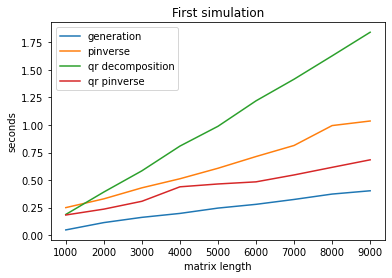

In [ ]:
length, times = simulation(start=1000, end=10000, step=1000, n=1000)

for k, v in times.items():
    plt.plot(length, v, label=k)

plt.title('First simulation')
plt.xlabel('matrix length')
plt.ylabel('seconds')
plt.legend()
plt.show()

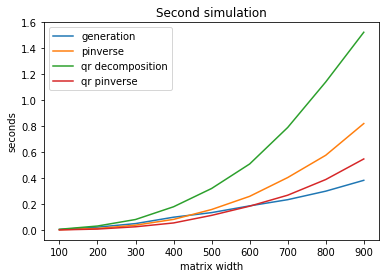

In [ ]:
length, times = simulation()

for k, v in times.items():
    plt.plot(length, v, label=k)

plt.title('Second simulation')
plt.xlabel('matrix width')
plt.ylabel('seconds')
plt.legend()
plt.show()